In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [5]:
data = sm.datasets.fair.load_pandas().data
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
data['affair'] = (data['affairs'] > 0).astype(int)

In [9]:
data['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [10]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [11]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [14]:
import seaborn as sns

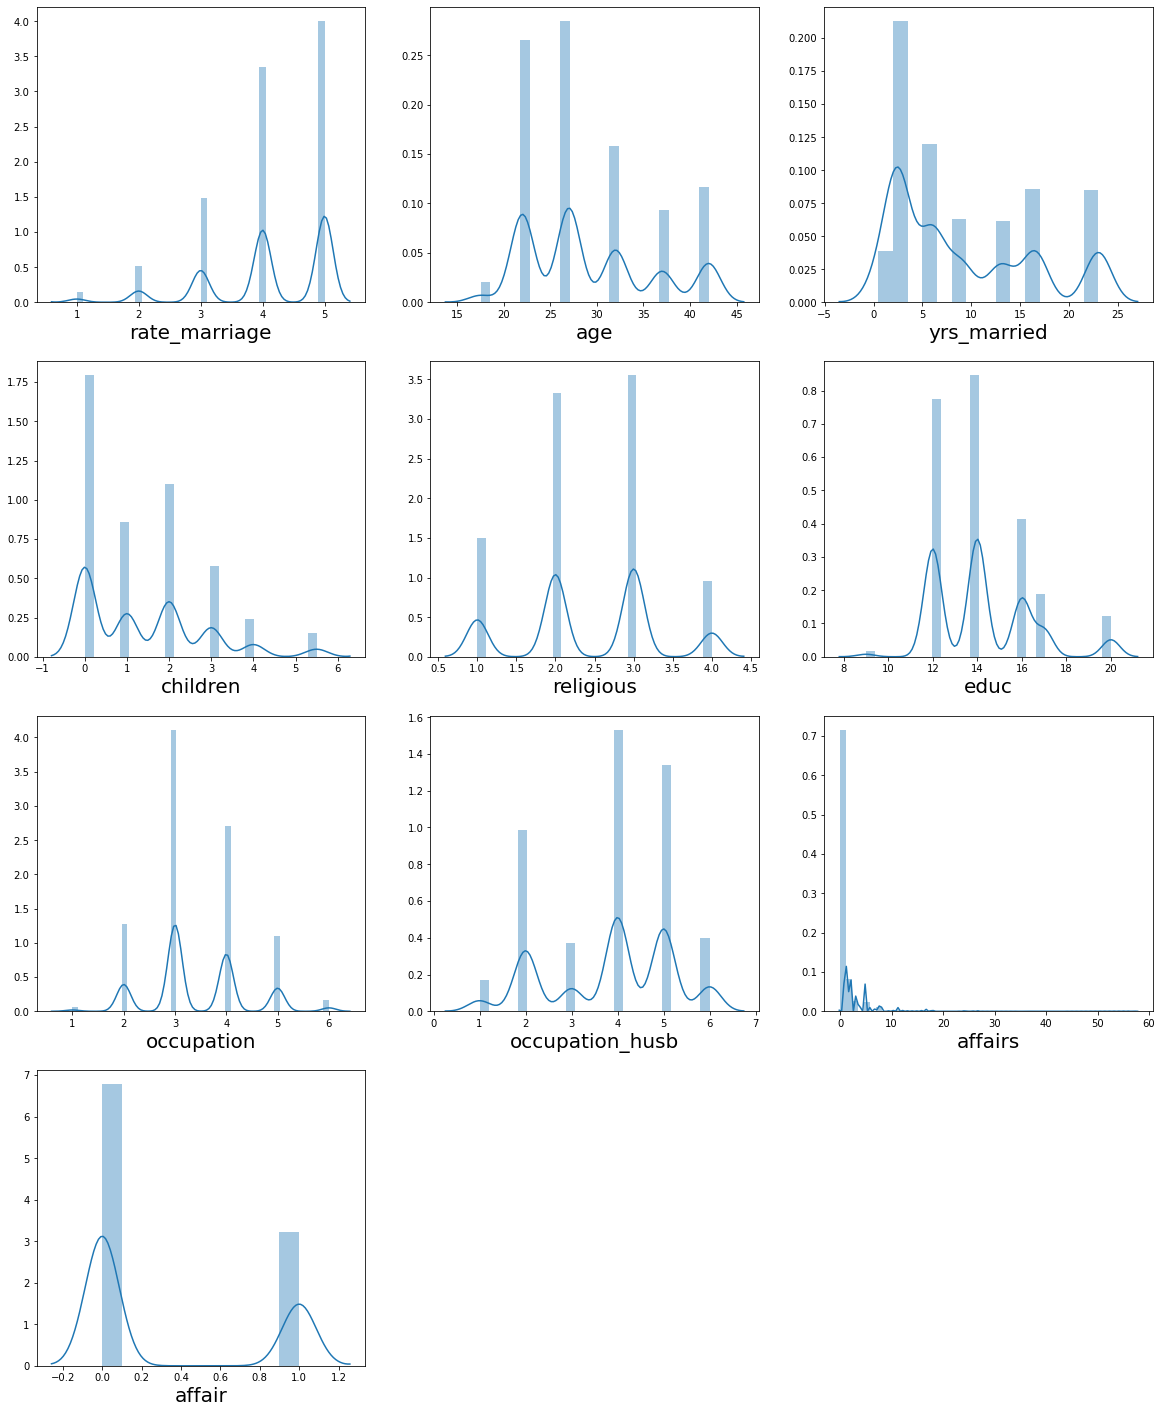

In [19]:
plt.figure(figsize=(20,25))
plotnumber = 1
for column in data:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

In [20]:
data['rate_marriage'].value_counts()

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64

In [22]:
data['age'].value_counts()

27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64

In [23]:
data['yrs_married'].value_counts()

2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64

In [24]:
data['children'].value_counts()

0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64

In [25]:
data['religious'].value_counts()

3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64

In [26]:
data['educ'].value_counts()

14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64

In [27]:
data['occupation'].value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

In [28]:
data['occupation_husb'].value_counts()

4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64

In [29]:
data['affairs'].value_counts()

0.000000     4313
1.400000      118
0.583333       86
0.400000       72
1.333333       72
             ... 
0.622222        1
39.199982       1
7.111111        1
4.923077        1
0.339394        1
Name: affairs, Length: 77, dtype: int64

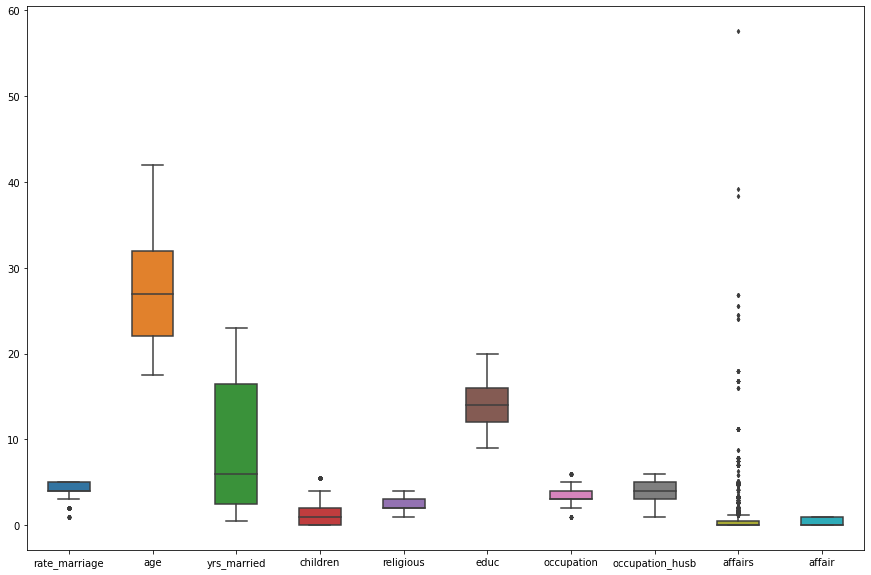

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5, fliersize=3)

In [33]:
x = data.drop(columns='affair')
y = data['affair']

In [34]:
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: affair, dtype: int32

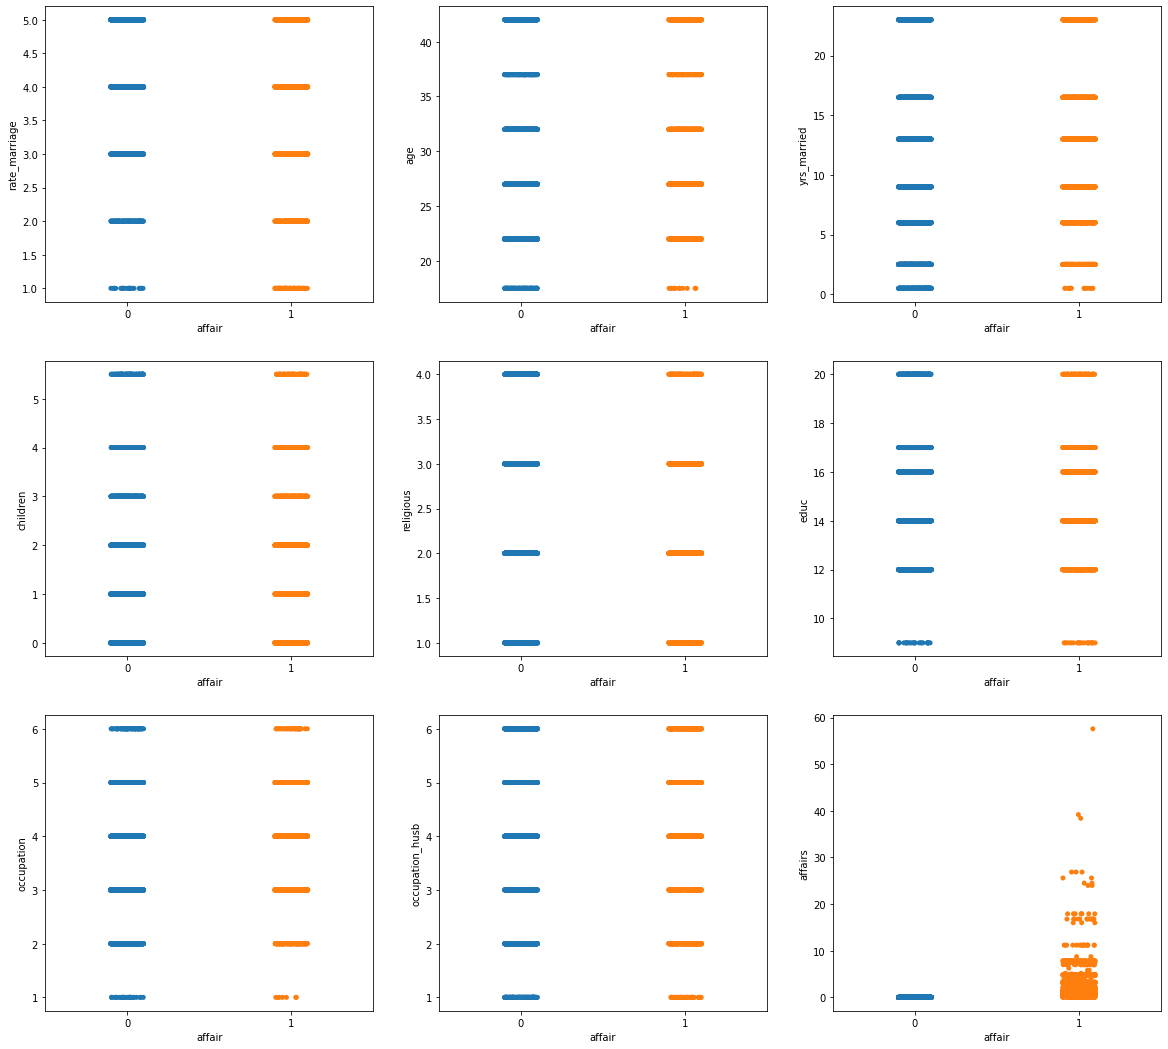

In [39]:
plt.figure(figsize=(20,25))
plotnumber = 1
for column in x:
    if plotnumber <= 15:
        ax = plt.subplot(4,3,plotnumber)
        sns.stripplot(y, x[column])
    plotnumber += 1

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [43]:
x_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
        -1.51129246e+00,  8.54069123e-01, -2.69727036e-01],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
        -4.50087100e-01,  1.11309009e-01,  1.14623935e+00],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -4.50087100e-01,  8.54069123e-01,  3.15280273e-01],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -4.50087100e-01, -2.11697133e+00, -3.20158710e-01],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
        -4.50087100e-01,  1.11309009e-01, -3.20158710e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -1.51129246e+00,  1.11309009e-01, -3.20158710e-01]])

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif['Features'] = x.columns

In [46]:
vif

,VIF,Features
0,1.070420,rate_marriage
1,5.456286,age
2,7.145901,yrs_married
3,2.529103,children
4,1.046895,religious
5,1.296556,educ
6,1.207701,occupation
7,1.082883,occupation_husb
8,1.057968,affairs


The vif values must be less than 5, so there is no multicollinearity. That's why we are dropping age and yrs_married column

In [56]:
x.drop(columns=['yrs_married', 'age'], inplace=True)

In [57]:
x.head()

,rate_marriage,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [58]:
x_scaled_new = scaler.fit_transform(x)
x_scaled_new

array([[-1.15425213,  1.11844056,  0.65334148, ..., -1.51129246,
         0.85406912, -0.26972704],
       [-1.15425213,  1.11844056, -1.62378518, ..., -0.4500871 ,
         0.11130901,  1.14623935],
       [-0.11405266, -0.97454634, -1.62378518, ..., -0.4500871 ,
         0.85406912,  0.31528027],
       ...,
       [ 0.92614681, -0.97454634, -0.48522185, ..., -0.4500871 ,
        -2.11697133, -0.32015871],
       [ 0.92614681, -0.27688404,  0.65334148, ..., -0.4500871 ,
         0.11130901, -0.32015871],
       [-0.11405266, -0.97454634, -0.48522185, ..., -1.51129246,
         0.11130901, -0.32015871]])

In [59]:
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(x_scaled_new, i) for i in range(x_scaled_new.shape[1])]

vif['Features'] = x.columns

In [60]:
vif

,VIF,Features
0,1.065536,rate_marriage
1,1.085275,children
2,1.044546,religious
3,1.224179,educ
4,1.198030,occupation
5,1.071518,occupation_husb
6,1.053624,affairs


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_new, y, test_size=0.25, random_state=355)

In [64]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [65]:
import pickle 

with open('modelforprediction.sav', 'wb') as f:
    pickle.dump(log_reg, f)
    
with open('sandardscaler.sav', 'wb') as f:
    pickle.dump(scaler, f)

In [66]:
y_pred = log_reg.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [69]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.957286432160804

In [71]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[1084,    0],
       [  68,  440]], dtype=int64)

In [72]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [73]:
# breaking down the formula for accuracy
accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
accuracy

0.957286432160804

In [74]:
# Precision
precision = true_positive / (true_positive + false_positive)
precision

1.0

In [75]:
# Recall
Recall = true_positive / (true_positive + false_negative)
Recall

0.9409722222222222

In [77]:
# F1 score
F1_score = 2 * (Recall * precision) / (Recall + precision)
F1_score

0.9695885509838997

In [78]:
# Area under curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9330708661417323

### ROC

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

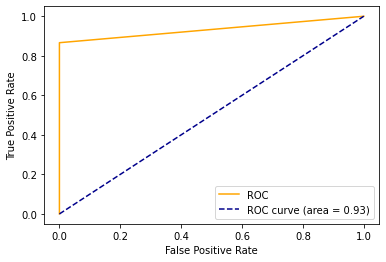

In [87]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label = 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()